In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
np.random.seed(42)
warnings.filterwarnings('ignore')


# Clustering Algorithms with Hyperparameter Research and 2D Visualization

In [2]:
data1=pd.read_csv("C:/Users/DELL/Downloads/data.csv")

In [3]:
class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3.0):
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for i in range(X.shape[1]):
            col = X[:, i]
            q1, q3 = np.percentile(col, [25, 75])
            IQR = q3 - q1
            l_bound = q1 - self.factor * IQR
            u_bound = q3 + self.factor * IQR

            if u_bound == 0:
                continue

            col[col < l_bound] = l_bound
            col[col > u_bound] = u_bound

        return X

In [4]:
def preprocess_data(data):
    data_encoded = data.copy()
    month_to_num = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    visitor_to_num = {
        'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0
    }

    data_encoded['Month'] = data_encoded['Month'].map(month_to_num)
    data_encoded['VisitorType'] = data_encoded['VisitorType'].map(visitor_to_num)

    label_encoder = LabelEncoder()
    data_encoded['Weekend'] = label_encoder.fit_transform(data_encoded['Weekend'])
    data_encoded['Revenue'] = label_encoder.fit_transform(data_encoded['Revenue'])

    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), data_encoded.columns[0:16]),
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('outlier_replacer', OutlierReplacer(factor=3.0)),
    ])

    data_encoded = pipeline.fit_transform(data_encoded)
    
    return pd.DataFrame(data_encoded)

## Data Preprocessing

In [5]:
train=preprocess_data(data1)

def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])



In [6]:
def apply_pca3D(data, n_components=3):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [13]:
data_pca = apply_pca(train)

In [27]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,9864.000000,9864.000000,9.864000e+03,9.864000e+03,9864.000000,9864.000000,9864.000000,9864.000000,9.864000e+03,9.864000e+03,9.864000e+03,9864.000000,9.864000e+03,9.864000e+03,9864.000000,9.864000e+03,9864.000000,9864.000000
mean,-0.004151,-0.085438,-3.974123e-01,-2.451678e-01,-0.060972,-0.055221,-0.173158,-0.050202,-3.155932e-01,-3.083643e-01,2.456470e-16,-0.015484,-2.086512e-01,3.290488e-16,-0.099655,4.005258e-01,0.227899,0.151764
std,0.978997,0.576028,6.422966e-14,1.498877e-14,0.703996,0.676577,0.439323,0.844394,4.341192e-14,6.561751e-14,1.000051e+00,0.913472,5.357098e-14,1.000051e+00,0.738144,5.029565e-14,0.419499,0.358810
min,-0.698469,-0.456937,-3.974123e-01,-2.451678e-01,-0.712218,-0.622722,-0.456303,-0.890820,-3.155932e-01,-3.083643e-01,-1.674193e+00,-1.231837,-2.086512e-01,-8.931468e-01,-0.762078,4.005258e-01,0.000000,0.000000
25%,-0.698469,-0.456937,-3.974123e-01,-2.451678e-01,-0.555129,-0.525985,-0.456303,-0.592181,-3.155932e-01,-3.083643e-01,-7.889640e-01,-0.133009,-2.086512e-01,-8.931468e-01,-0.514160,4.005258e-01,0.000000,0.000000
50%,-0.395159,-0.411867,-3.974123e-01,-2.451678e-01,-0.308274,-0.309345,-0.393920,-0.368202,-3.155932e-01,-3.083643e-01,9.626474e-02,-0.133009,-2.086512e-01,-6.404836e-02,-0.514160,4.005258e-01,0.000000,0.000000
75%,0.514773,0.061367,-3.974123e-01,-2.451678e-01,0.118110,0.142432,-0.105175,0.154416,-3.155932e-01,-3.083643e-01,9.814935e-01,0.965819,-2.086512e-01,3.505009e-01,-0.018322,4.005258e-01,0.000000,0.000000
max,4.154501,1.616279,-3.974123e-01,-2.451678e-01,2.137827,2.147681,0.948207,2.394208,-3.155932e-01,-3.083643e-01,1.276570e+00,4.262302,-2.086512e-01,2.423247e+00,1.469189,4.005258e-01,1.000000,1.000000


## Hyperparameter Research


In [6]:

def evaluate_clustering(data, labels):
    score = silhouette_score(data, labels)
    return score


def kmeans_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def hierarchical_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        agg_clustering = AgglomerativeClustering(**params)
        labels = agg_clustering.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def gmm_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        gmm = GaussianMixture(**params, random_state=42)
        labels = gmm.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score

def dbscan_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(**params)
        labels = dbscan.fit_predict(data)
        # Silhouette score requires at least 2 clusters
        if len(set(labels)) > 1:
            score = evaluate_clustering(data, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_params, best_score

In [7]:

kmeans_param_grid = {
    'n_clusters': [2, 3, 4, 5,6,7,8,9],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 600]
}

hierarchical_param_grid = {
    'n_clusters': [2, 3, 4, 5,6,7,8,9],
    'linkage': ['ward', 'complete', 'average', 'single']
}

gmm_param_grid = {
    'n_components': [2, 3, 4, 5,6,7,8,9],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

dbscan_param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [5, 10, 15]
}

In [8]:
print("\nK-Means Hyperparameter Research:")
best_kmeans_params, best_kmeans_score = kmeans_hyperparameter_research(train, kmeans_param_grid)
print(f"Best K-Means Params: {best_kmeans_params}, Best Score: {best_kmeans_score:.2f}")


K-Means Hyperparameter Research:
Best K-Means Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}, Best Score: 0.20


In [9]:
print("\nHierarchical Clustering Hyperparameter Research:")
best_hierarchical_params, best_hierarchical_score = hierarchical_hyperparameter_research(train, hierarchical_param_grid)
print(f"Best Hierarchical Params: {best_hierarchical_params}, Best Score: {best_hierarchical_score:.2f}")


Hierarchical Clustering Hyperparameter Research:
Best Hierarchical Params: {'linkage': 'single', 'n_clusters': 2}, Best Score: 0.46


In [10]:

print("\nGMM Hyperparameter Research:")
best_gmm_params, best_gmm_score = gmm_hyperparameter_research(train, gmm_param_grid)
print(f"Best GMM Params: {best_gmm_params}, Best Score: {best_gmm_score:.2f}")



GMM Hyperparameter Research:
Best GMM Params: {'covariance_type': 'spherical', 'n_components': 2}, Best Score: 0.23


In [11]:
print("\nDBSCAN Hyperparameter Research:")
best_dbscan_params, best_dbscan_score = dbscan_hyperparameter_research(train, dbscan_param_grid)
print(f"Best DBSCAN Params: {best_dbscan_params}, Best Score: {best_dbscan_score:.2f}")


DBSCAN Hyperparameter Research:
Best DBSCAN Params: {'eps': 0.7, 'min_samples': 15}, Best Score: -0.22


## Clustering with Best Hyperparameters

In [9]:

def kmeans_clustering(data, params):
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

def hierarchical_clustering(data, params):
    agg_clustering = AgglomerativeClustering(**params)
    labels = agg_clustering.fit_predict(data)
    return labels

def gmm_clustering(data, params):
    gmm = GaussianMixture(**params, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

def dbscan_clustering(data, params):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(data)
    return labels


best_gmm_params={'covariance_type': 'spherical', 'n_components': 2}
kmeans_labels = kmeans_clustering(train, best_kmeans_params)
# hierarchical_labels = hierarchical_clustering(train, best_hierarchical_params)
gmm_labels = gmm_clustering(train, best_gmm_params)
# dbscan_labels = dbscan_clustering(train, best_dbscan_params)


In [10]:
params6={'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6, 'n_init': 10}
kmeans_labels_n6=kmeans_clustering(train,params6)

In [11]:
params4={'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 10}
kmeans_labels_n4=kmeans_clustering(train,params4)

In [12]:
params3={'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10}
kmeans_labels_n3=kmeans_clustering(train,params3)

In [13]:
params9={'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 10}
kmeans_labels_n9=kmeans_clustering(train,params9)

In [43]:
params10={'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10}
kmeans_labels_n10=kmeans_clustering(train,params10)

In [21]:
#train['kmeans_labels'] = kmeans_labels
#train['hierarchical_labels'] = hierarchical_labels
train['gmm_labels'] = gmm_labels
train['kmeans_3_labels']=kmeans_labels_n3
train['kmeans_6_labels']=kmeans_labels_n6

#train['dbscan_labels'] = dbscan_labels

## 2D Visualization

In [14]:

def plot_clusters_2d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot()
    scatter = ax.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(title)
    plt.show()

# print("\nPlotting Clusters:")
# plot_clusters_2d(data_pca, kmeans_labels, "K-Means Clustering with Best Hyperparameters")
# plot_clusters_2d(data_pca, hierarchical_labels, "Hierarchical Clustering with Best Hyperparameters")
# plot_clusters_2d(data_pca, gmm_labels, "GMM Clustering with Best Hyperparameters")
# plot_clusters_2d(data_pca, dbscan_labels, "DBSCAN Clustering with Best Hyperparameters")

## Metrics


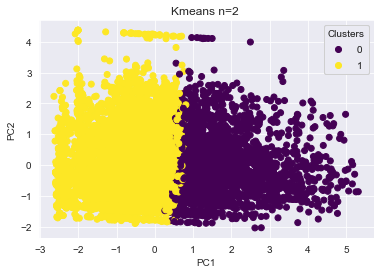

In [15]:
plot_clusters_2d(apply_pca(train),kmeans_labels,"Kmeans n=2 ")

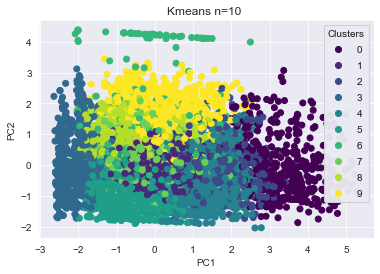

In [44]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n10,"Kmeans n=10 ")


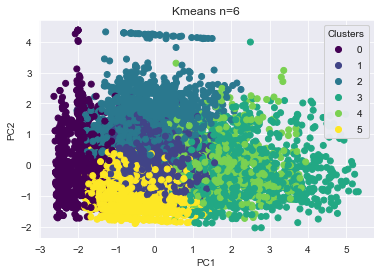

In [16]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n6,"Kmeans n=6")

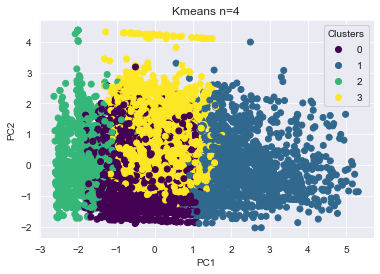

In [17]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n4,"Kmeans n=4")


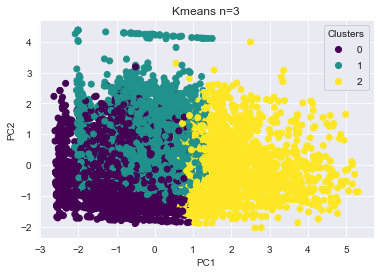

In [18]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n3,"Kmeans n=3")


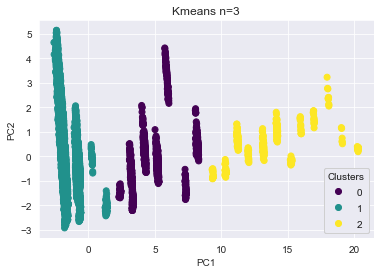

In [67]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n3,"Kmeans n=3")


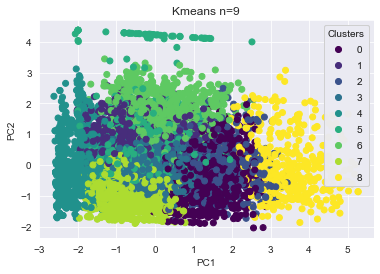

In [56]:
plot_clusters_2d(apply_pca(train),kmeans_labels_n9,"Kmeans n=9")


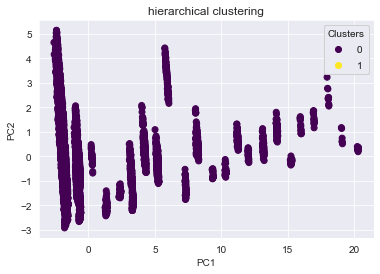

In [16]:
plot_clusters_2d(apply_pca(train),hierarchical_labels,"hierarchical clustering")

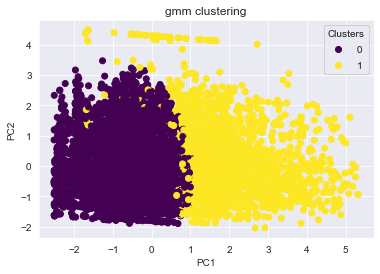

In [18]:
plot_clusters_2d(apply_pca(train),gmm_labels,"gmm clustering")

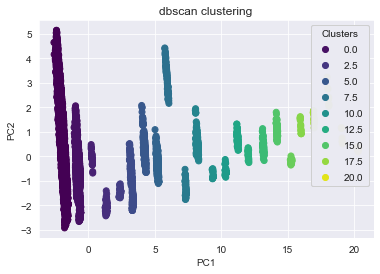

In [18]:
plot_clusters_2d(apply_pca(train),dbscan_labels,"dbscan clustering")

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score1 = silhouette_score(train, kmeans_labels)
db_score1 = davies_bouldin_score(train, kmeans_labels)

# sil_score2 = silhouette_score(train, hierarchical_labels)
# db_score2 = davies_bouldin_score(train, hierarchical_labels)
# 
# sil_score3 = silhouette_score(train, gmm_labels)
# db_score3 = davies_bouldin_score(train, gmm_labels)
# 
# sil_score4 = silhouette_score(train, dbscan_labels)
# db_score4 = davies_bouldin_score(train, dbscan_labels)
sil_score5 = silhouette_score(train, kmeans_labels_n6)
db_score5 = davies_bouldin_score(train, kmeans_labels_n6)

#print(f'KMeans Silhouette Score: {sil_score1}', f' KMeans Davies-Bouldin Index: {db_score1}')
# print(f'Hierarchical Silhouette Score: {sil_score2}', f' Hierarchical Davies-Bouldin Index: {db_score2}')
# print(f'GMM Silhouette Score: {sil_score3}', f' GMM Davies-Bouldin Index: {db_score3}')
# print(f'Dbscan Silhouette Score: {sil_score4}', f' Dbscan Davies-Bouldin Index: {db_score4}')
print(f'KMeans 6 clusters Silhouette Score: {sil_score5}', f' KMeans Davies-Bouldin Index: {db_score5}')


KMeans 6 clusters Silhouette Score: 0.18183556905203266  KMeans Davies-Bouldin Index: 1.6152694763705429


In [20]:
sil_score6 = silhouette_score(train, kmeans_labels_n3)
db_score6 = davies_bouldin_score(train, kmeans_labels_n3)
print(f'KMeans 3 clusters Silhouette Score: {sil_score6}', f' KMeans Davies-Bouldin Index: {db_score6}')


KMeans 3 clusters Silhouette Score: 0.16285186741471427  KMeans Davies-Bouldin Index: 1.9863019466815175


In [38]:
sil_score7 = silhouette_score(train, kmeans_labels_n9)
db_score7 = davies_bouldin_score(train, kmeans_labels_n9)
print(f'KMeans 9 clusters Silhouette Score: {sil_score7}', f' KMeans Davies-Bouldin Index: {db_score7}')

KMeans 9 clusters Silhouette Score: 0.174457772741358  KMeans Davies-Bouldin Index: 1.612508034495692


In [45]:
sil_score8 = silhouette_score(train, kmeans_labels_n10)
db_score8 = davies_bouldin_score(train, kmeans_labels_n10)
print(f'KMeans 9 clusters Silhouette Score: {sil_score8}', f' KMeans Davies-Bouldin Index: {db_score8}')

KMeans 9 clusters Silhouette Score: 0.17856872212661762  KMeans Davies-Bouldin Index: 1.5864873350582949


In [20]:
labels, counts = np.unique(kmeans_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f'KMeans Cluster {label}: {count} instances')

labels, counts = np.unique(hierarchical_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Hierarchical Cluster {label}: {count} instances')

labels, counts = np.unique(gmm_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f'GMM Cluster {label}: {count} instances')

labels, counts = np.unique(dbscan_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Dbscan Cluster {label}: {count} instances')

KMeans Cluster 0: 7209 instances
KMeans Cluster 1: 2655 instances
Hierarchical Cluster 0: 9863 instances
Hierarchical Cluster 1: 1 instances
GMM Cluster 0: 7517 instances
GMM Cluster 1: 2347 instances
Dbscan Cluster -1: 5153 instances
Dbscan Cluster 0: 2840 instances
Dbscan Cluster 1: 31 instances
Dbscan Cluster 2: 101 instances
Dbscan Cluster 3: 56 instances
Dbscan Cluster 4: 293 instances
Dbscan Cluster 5: 321 instances
Dbscan Cluster 6: 338 instances
Dbscan Cluster 7: 93 instances
Dbscan Cluster 8: 53 instances
Dbscan Cluster 9: 190 instances
Dbscan Cluster 10: 22 instances
Dbscan Cluster 11: 51 instances
Dbscan Cluster 12: 73 instances
Dbscan Cluster 13: 21 instances
Dbscan Cluster 14: 73 instances
Dbscan Cluster 15: 60 instances
Dbscan Cluster 16: 29 instances
Dbscan Cluster 17: 18 instances
Dbscan Cluster 18: 15 instances
Dbscan Cluster 19: 12 instances
Dbscan Cluster 20: 6 instances
Dbscan Cluster 21: 15 instances


In [44]:
labels, counts = np.unique(dbscan_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f'DBScan Cluster {label}: {count} instances')

DBScan Cluster -1: 5153 instances
DBScan Cluster 0: 2840 instances
DBScan Cluster 1: 31 instances
DBScan Cluster 2: 101 instances
DBScan Cluster 3: 56 instances
DBScan Cluster 4: 293 instances
DBScan Cluster 5: 321 instances
DBScan Cluster 6: 338 instances
DBScan Cluster 7: 93 instances
DBScan Cluster 8: 53 instances
DBScan Cluster 9: 190 instances
DBScan Cluster 10: 22 instances
DBScan Cluster 11: 51 instances
DBScan Cluster 12: 73 instances
DBScan Cluster 13: 21 instances
DBScan Cluster 14: 73 instances
DBScan Cluster 15: 60 instances
DBScan Cluster 16: 29 instances
DBScan Cluster 17: 18 instances
DBScan Cluster 18: 15 instances
DBScan Cluster 19: 12 instances
DBScan Cluster 20: 6 instances
DBScan Cluster 21: 15 instances


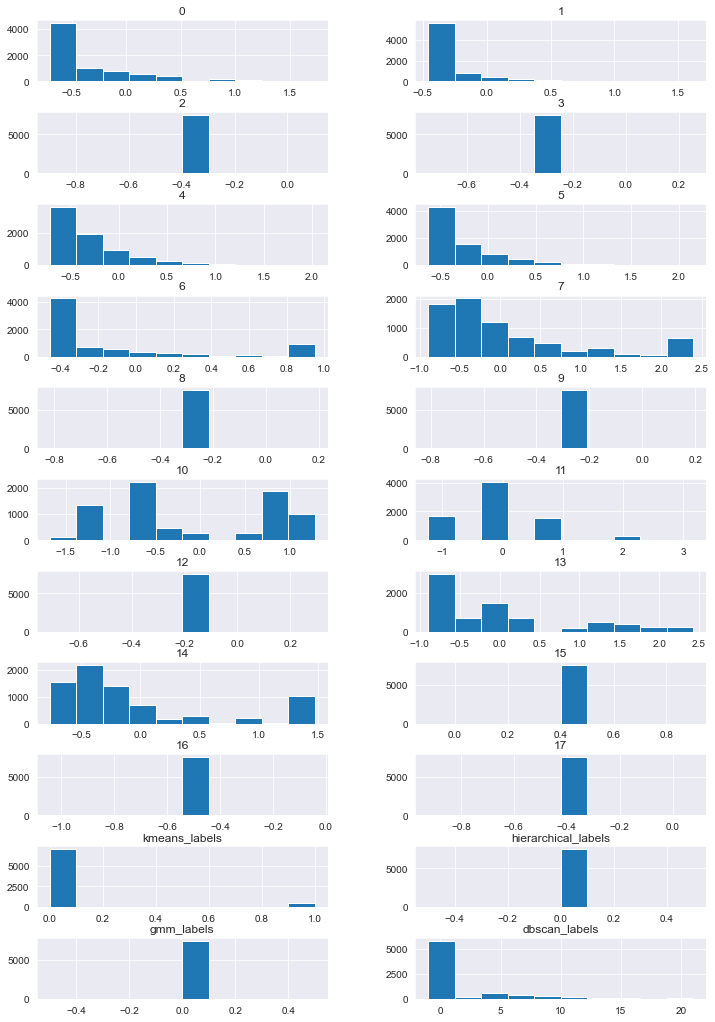

In [52]:
train[train['gmm_labels']==0].hist(figsize=(12,18), layout=(11, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

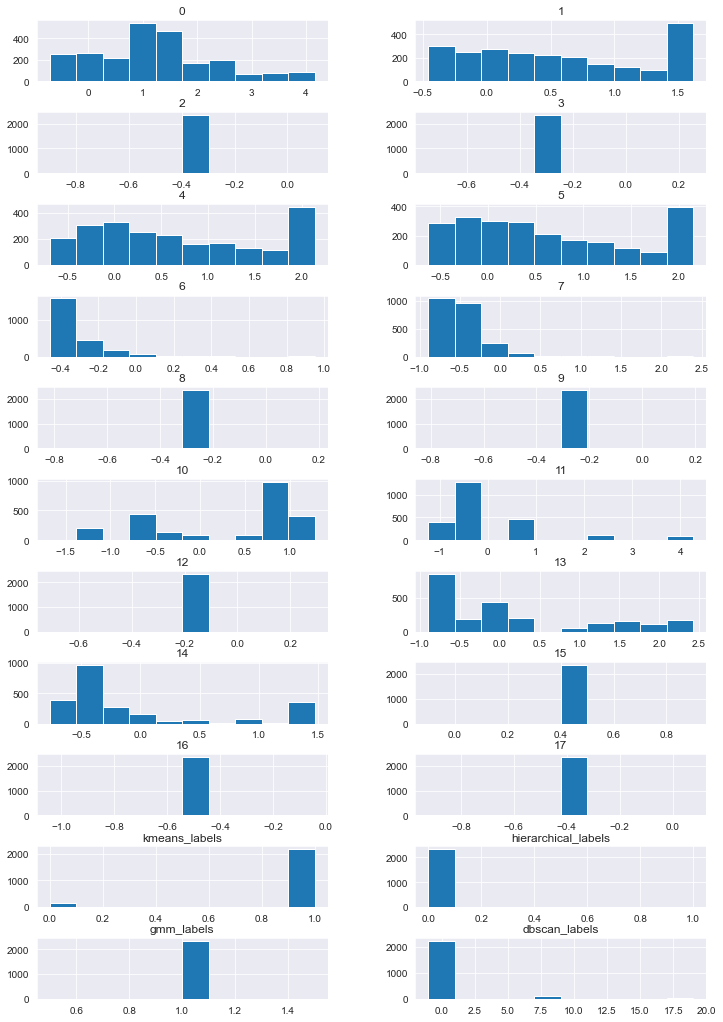

In [53]:
train[train['gmm_labels']==1].hist(figsize=(12,18), layout=(11, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

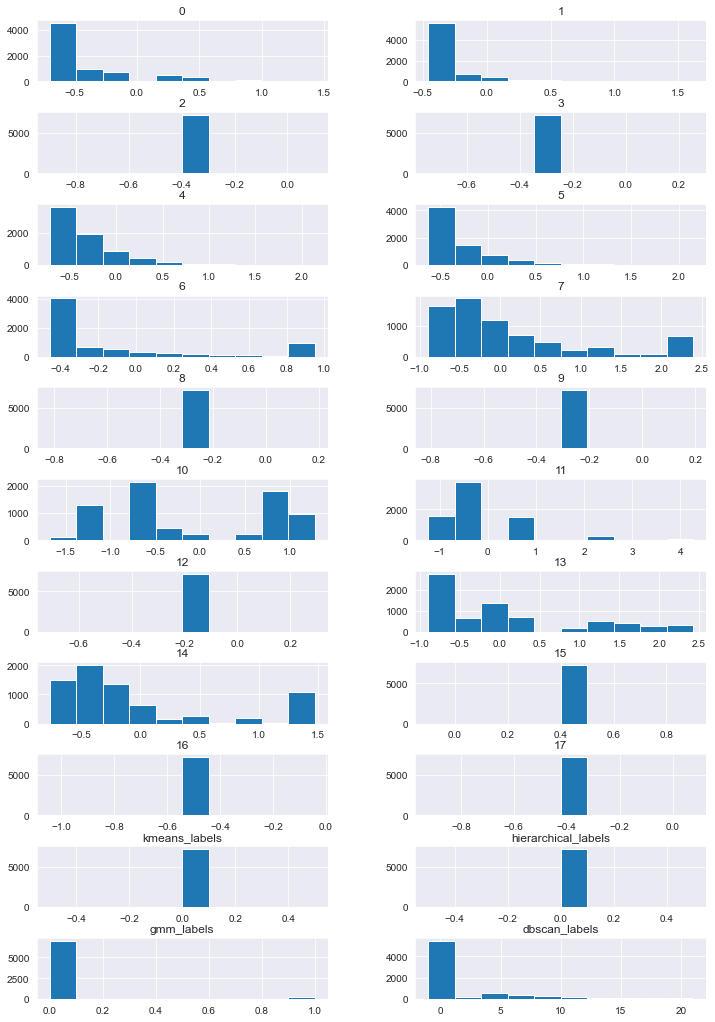

In [54]:
train[train['kmeans_labels']==0].hist(figsize=(12,18), layout=(11, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

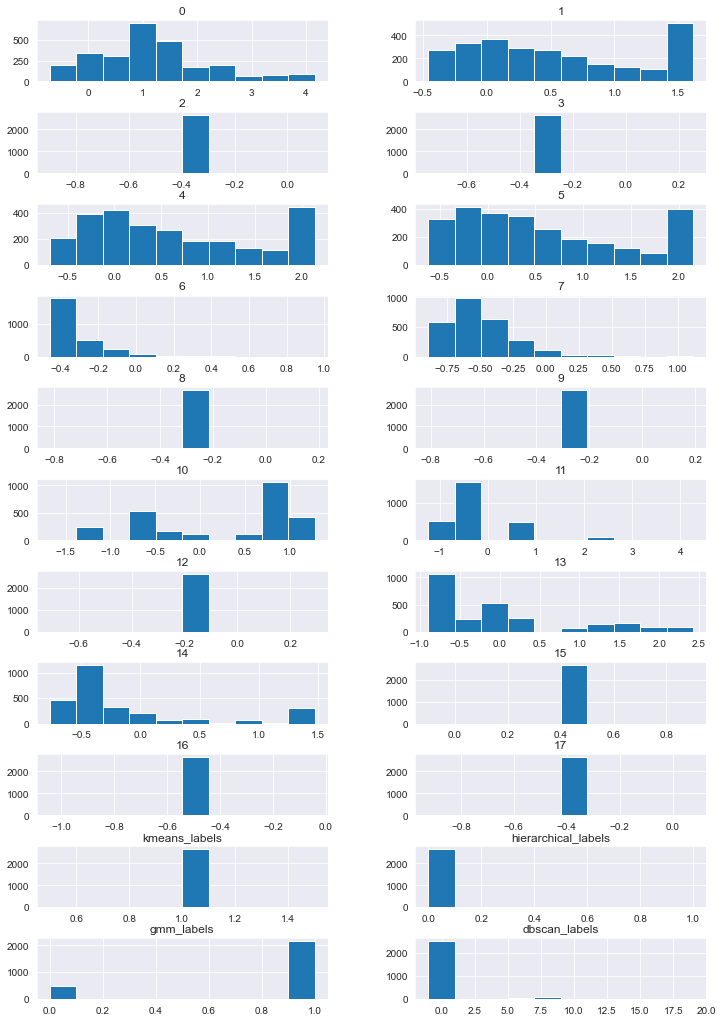

In [55]:
train[train['kmeans_labels']==1].hist(figsize=(12,18), layout=(11, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

##TEST

In [23]:
test=pd.read_csv("C:/Users/DELL/Downloads/val.csv")

In [24]:
test=preprocess_data(test)

In [25]:
kmeans_labels2 = kmeans_clustering(test, best_kmeans_params)
hierarchical_labels2 = hierarchical_clustering(test, best_hierarchical_params)
gmm_labels2 = gmm_clustering(test, best_gmm_params)
dbscan_labels2 = dbscan_clustering(test, best_dbscan_params)

sil_score1 = silhouette_score(test, kmeans_labels2)
db_score1 = davies_bouldin_score(test, kmeans_labels2)

sil_score2 = silhouette_score(test, hierarchical_labels2)
db_score2 = davies_bouldin_score(test, hierarchical_labels2)

sil_score3 = silhouette_score(test, gmm_labels2)
db_score3 = davies_bouldin_score(test, gmm_labels2)

sil_score4 = silhouette_score(test, dbscan_labels2)
db_score4 = davies_bouldin_score(test, dbscan_labels2)

print(f'KMeans Silhouette Score: {sil_score1}', f' KMeans Davies-Bouldin Index: {db_score1}')
print(f'Hierarchical Silhouette Score: {sil_score2}', f' Hierarchical Davies-Bouldin Index: {db_score2}')
print(f'GMM Silhouette Score: {sil_score3}', f' GMM Davies-Bouldin Index: {db_score3}')
print(f'Dbscan Silhouette Score: {sil_score4}', f' Dbscan Davies-Bouldin Index: {db_score4}')

KMeans Silhouette Score: 0.18565148580826574  KMeans Davies-Bouldin Index: 2.090050421328687
Hierarchical Silhouette Score: 0.4102121820923313  Hierarchical Davies-Bouldin Index: 0.44872414607083216
GMM Silhouette Score: 0.20779912463630965  GMM Davies-Bouldin Index: 2.1199483183536567
Dbscan Silhouette Score: -0.20130050502732633  Dbscan Davies-Bouldin Index: 1.822915254663168


In [26]:
labels, counts = np.unique(kmeans_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'KMeans Cluster {label}: {count} instances')

labels, counts = np.unique(hierarchical_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Hierarchical Cluster {label}: {count} instances')

labels, counts = np.unique(gmm_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'GMM Cluster {label}: {count} instances')

labels, counts = np.unique(dbscan_labels2, return_counts=True)
for label, count in zip(labels, counts):
    print(f'Dbscan Cluster {label}: {count} instances')

KMeans Cluster 0: 702 instances
KMeans Cluster 1: 1764 instances
Hierarchical Cluster 0: 2465 instances
Hierarchical Cluster 1: 1 instances
GMM Cluster 0: 1845 instances
GMM Cluster 1: 621 instances
Dbscan Cluster -1: 2226 instances
Dbscan Cluster 0: 132 instances
Dbscan Cluster 1: 86 instances
Dbscan Cluster 2: 22 instances


In [21]:
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
visitor_to_num = {
    'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0
}
bool_to_num={'True':1, 'False':0}
data1['Month']=data1['Month'].map(month_to_num)
data1['VisitorType']=data1['VisitorType'].map(visitor_to_num)
data1['Revenue']=data1['Revenue'].astype(int)
data1['Weekend']=data1['Weekend'].astype(int)

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   int64  
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

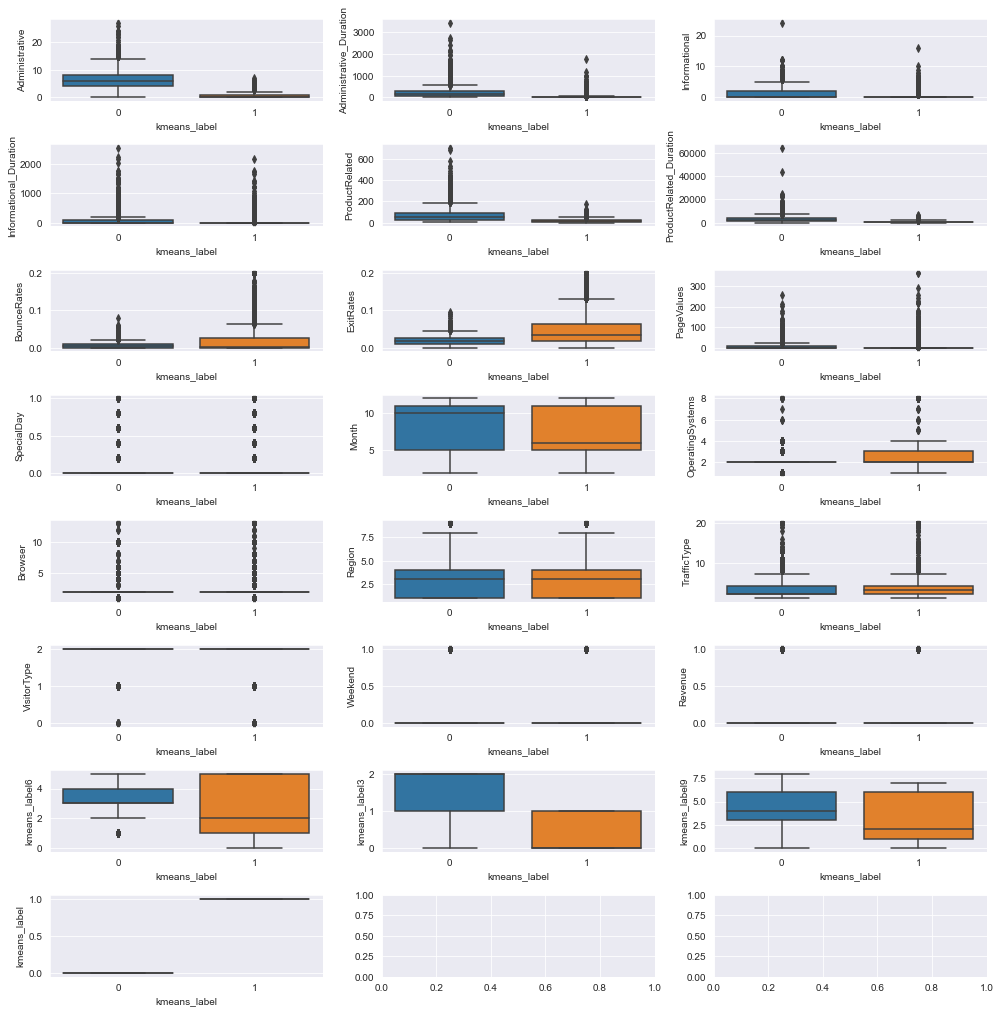

In [32]:
fig, ax = plt.subplots(8, 3, figsize=(14, 14))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

In [30]:
data1['kmeans_label']=kmeans_labels

In [25]:
data1['kmeans_label6']=kmeans_labels_n6

In [54]:
data1['kmeans_label3']=kmeans_labels_n3
data1['kmeans_label4']=kmeans_labels_n4


In [46]:
data1['kmeans_label9']=kmeans_labels_n9
data1['kmeans_label10']=kmeans_labels_n10


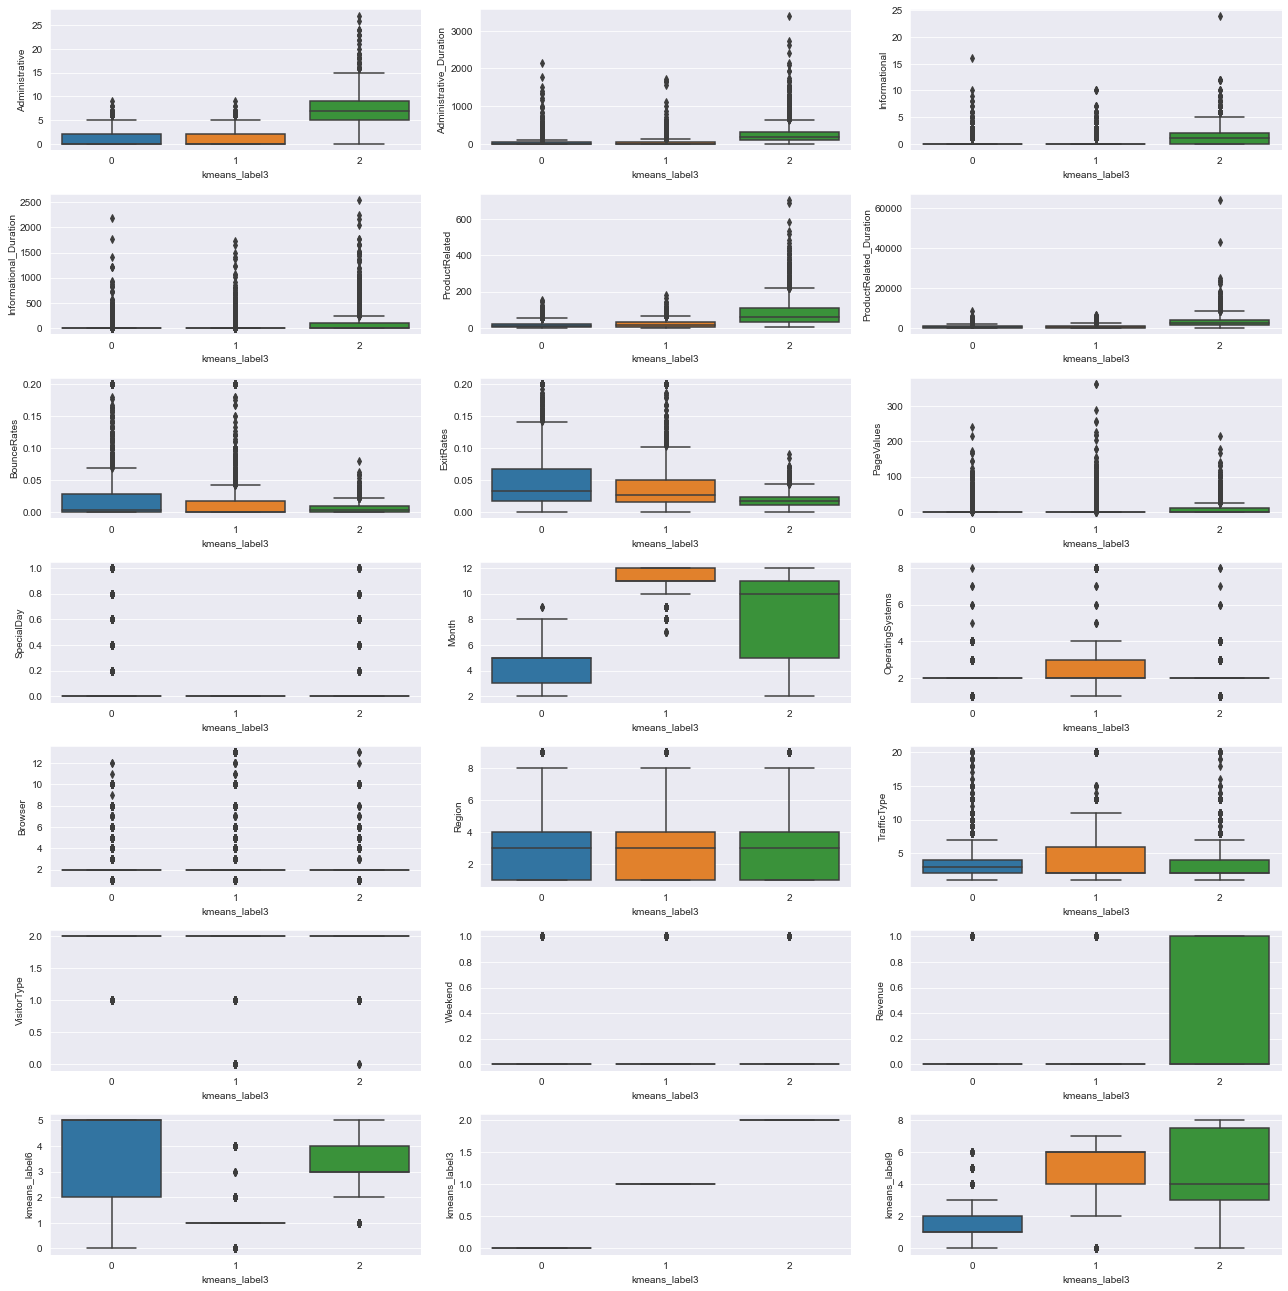

In [43]:
fig, ax = plt.subplots(7, 3, figsize=(18, 18))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label3", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

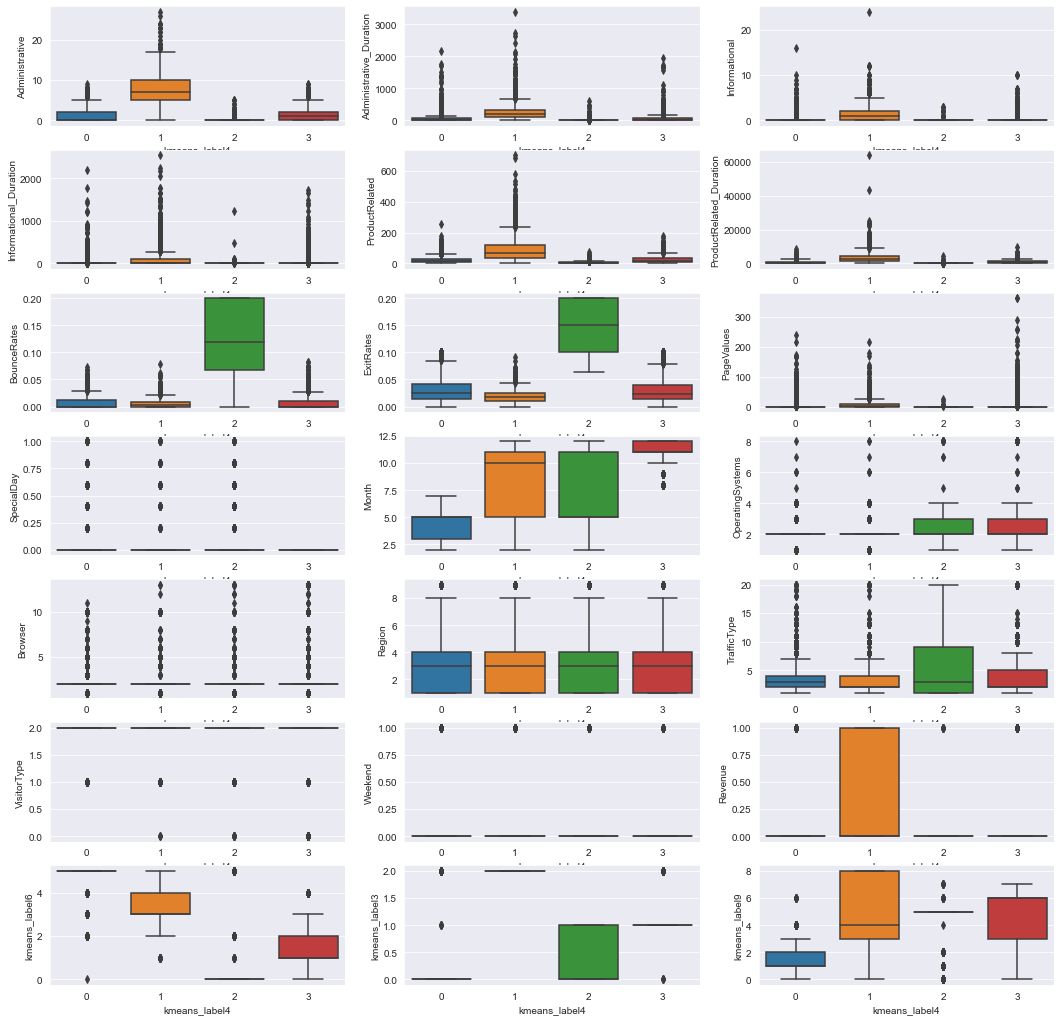

In [55]:
fig, ax = plt.subplots(7, 3, figsize=(18, 18))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label4", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

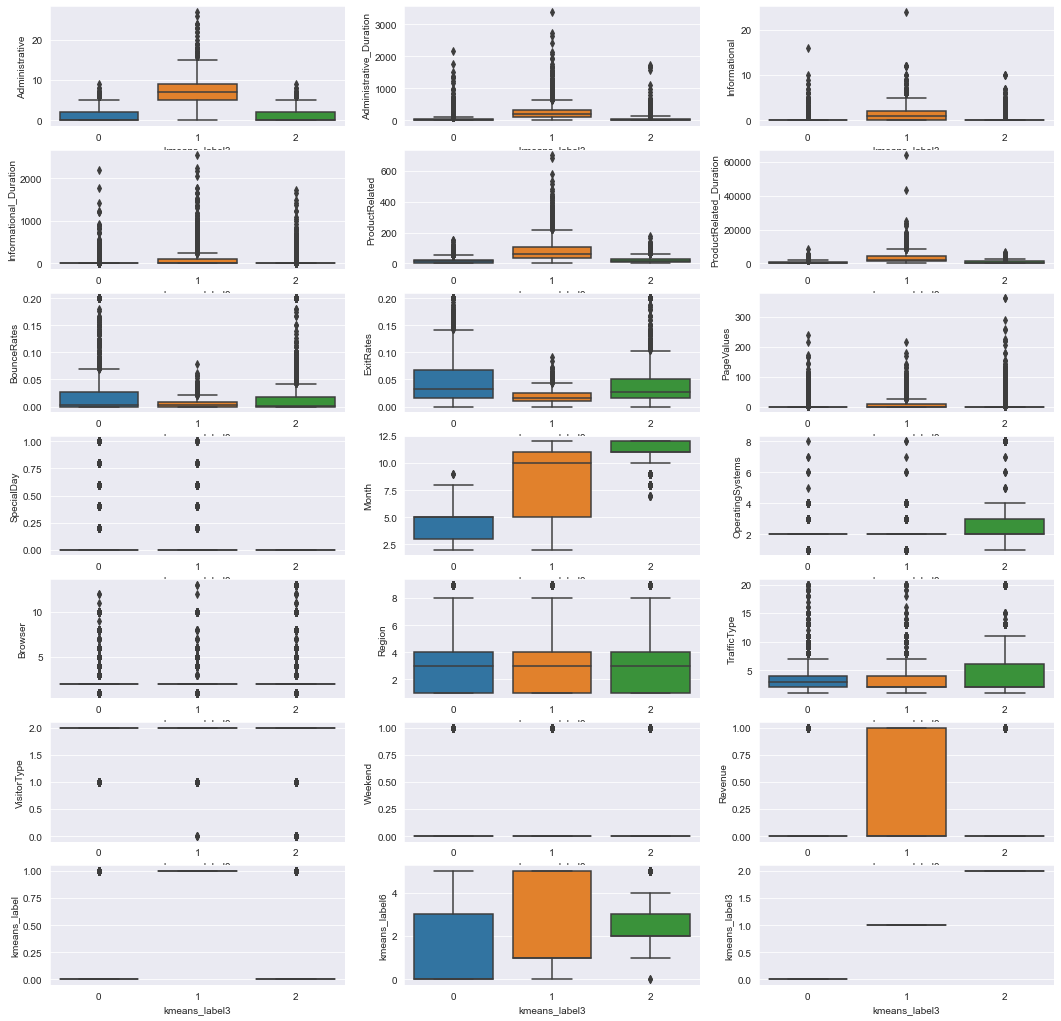

In [66]:
fig, ax = plt.subplots(7, 3, figsize=(18, 18))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label3", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

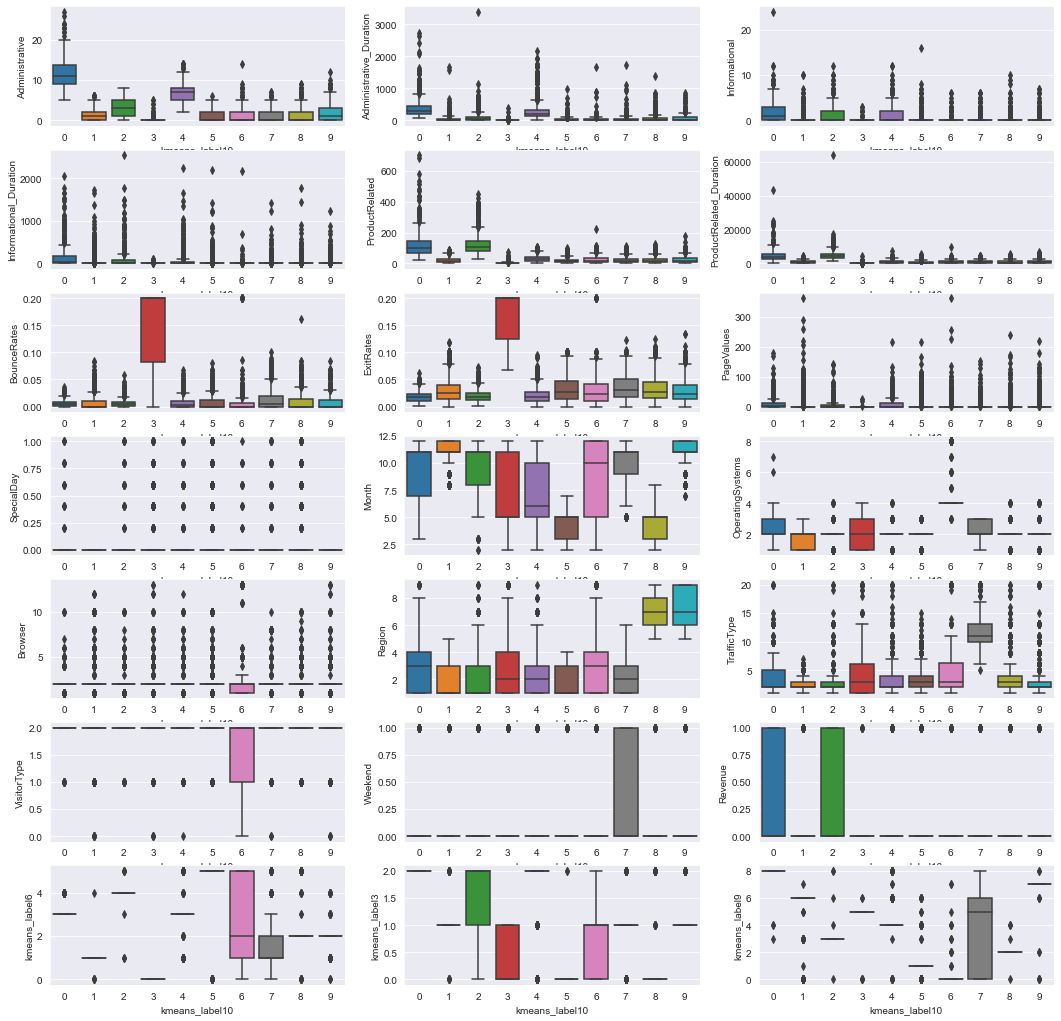

In [47]:
fig, ax = plt.subplots(7, 3, figsize=(18, 18))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label10", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

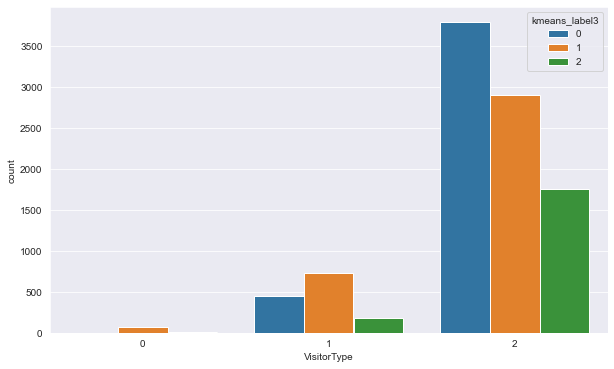

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='kmeans_label3', data=data1)
plt.show()

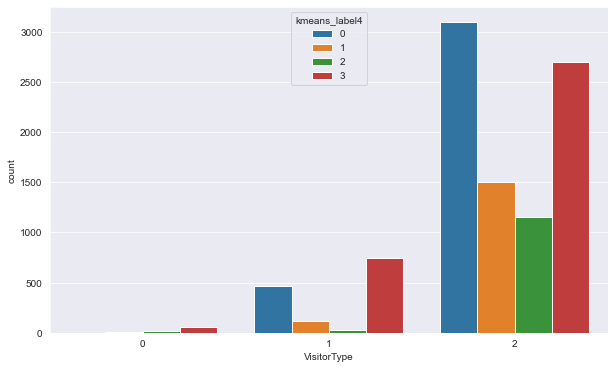

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='kmeans_label4', data=data1)
plt.show()

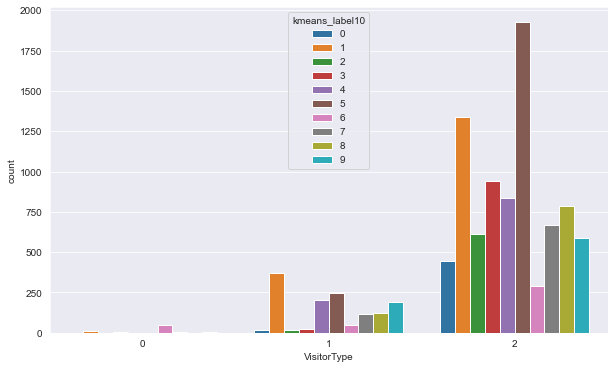

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='kmeans_label10', data=data1)
plt.show()

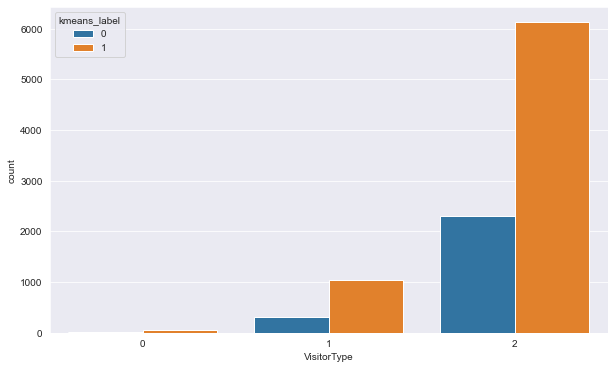

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='kmeans_label', data=data1)
plt.show()

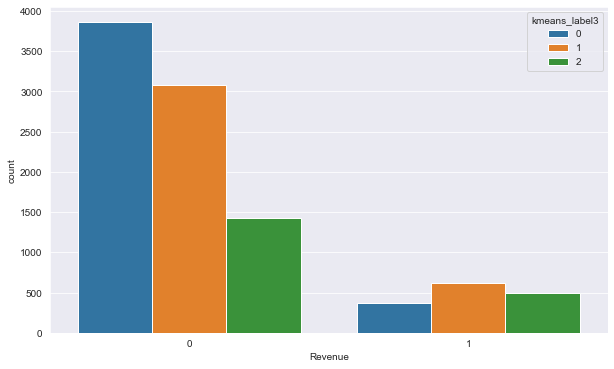

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='kmeans_label3', data=data1)
plt.show()

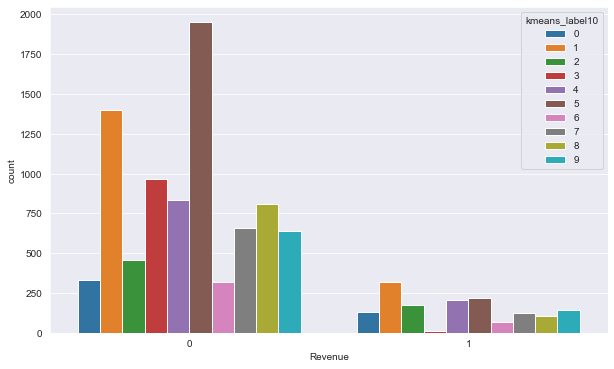

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='kmeans_label10', data=data1)
plt.show()

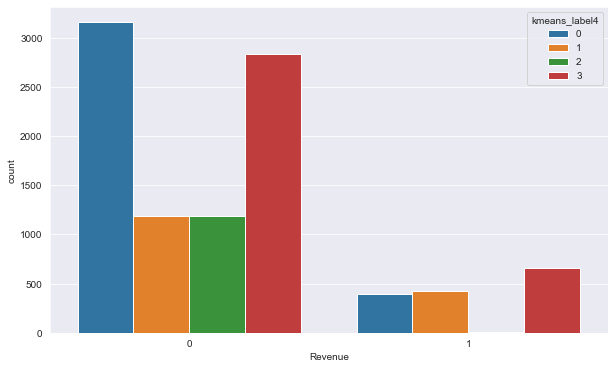

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='kmeans_label4', data=data1)
plt.show()

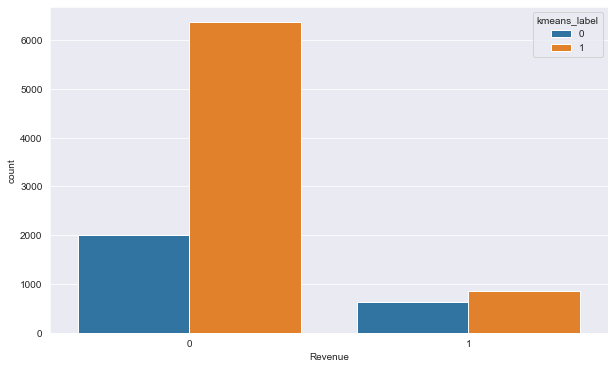

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='kmeans_label', data=data1)
plt.show()

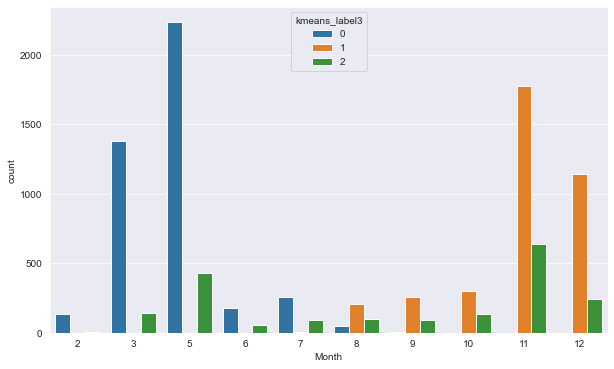

In [37]:

plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='kmeans_label3', data=data1)
plt.show()

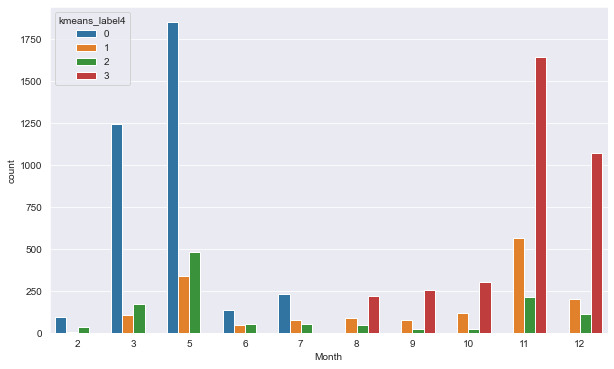

In [58]:

plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='kmeans_label4', data=data1)
plt.show()

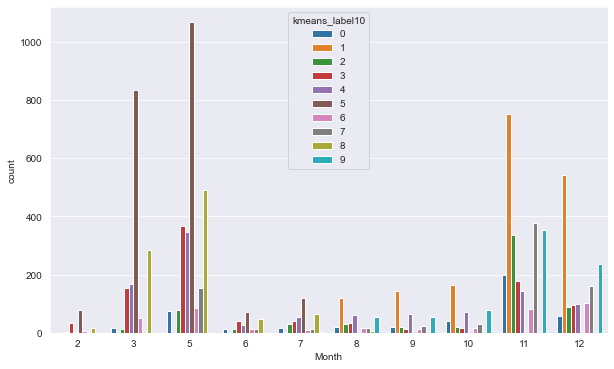

In [50]:
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='kmeans_label10', data=data1)
plt.show()

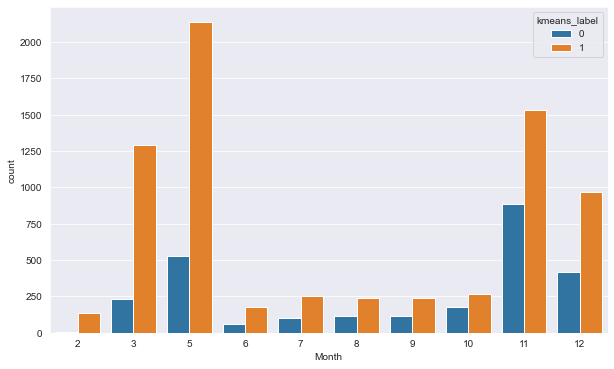

In [38]:
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='kmeans_label', data=data1)
plt.show()

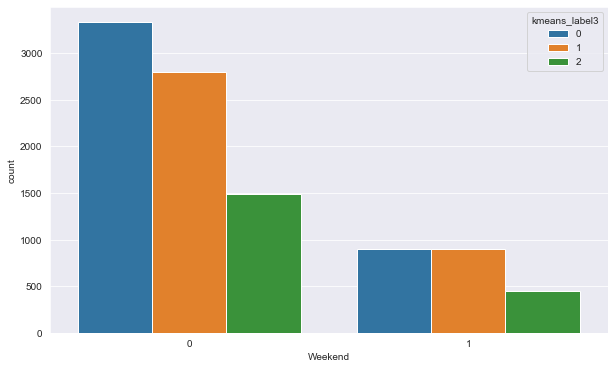

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekend', hue='kmeans_label3', data=data1)
plt.show()

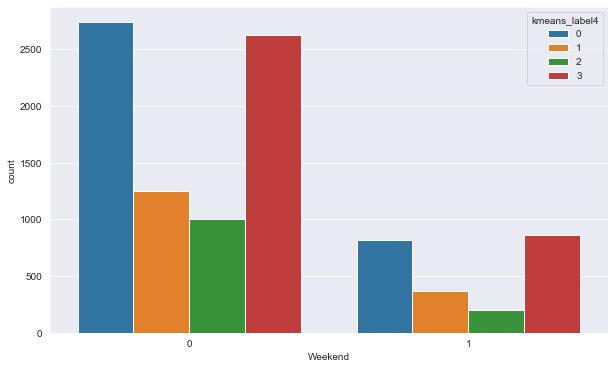

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekend', hue='kmeans_label4', data=data1)
plt.show()

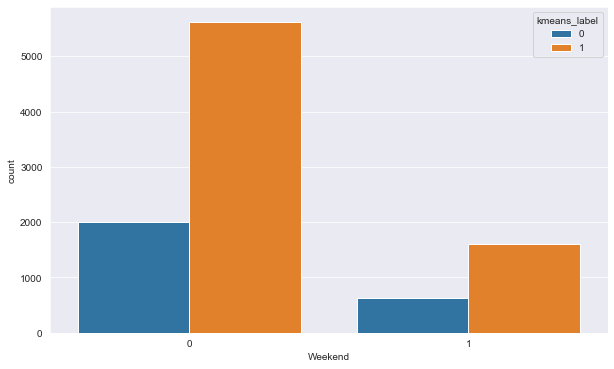

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekend', hue='kmeans_label', data=data1)
plt.show()

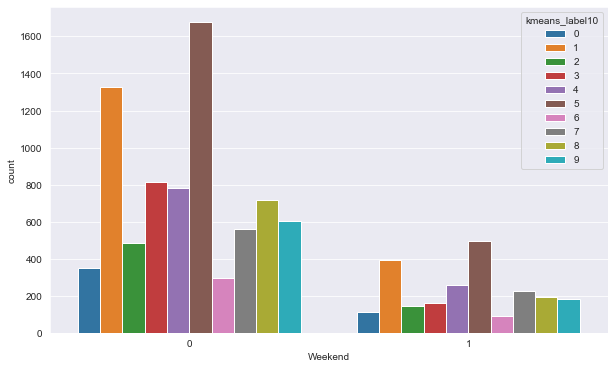

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekend', hue='kmeans_label10', data=data1)
plt.show()

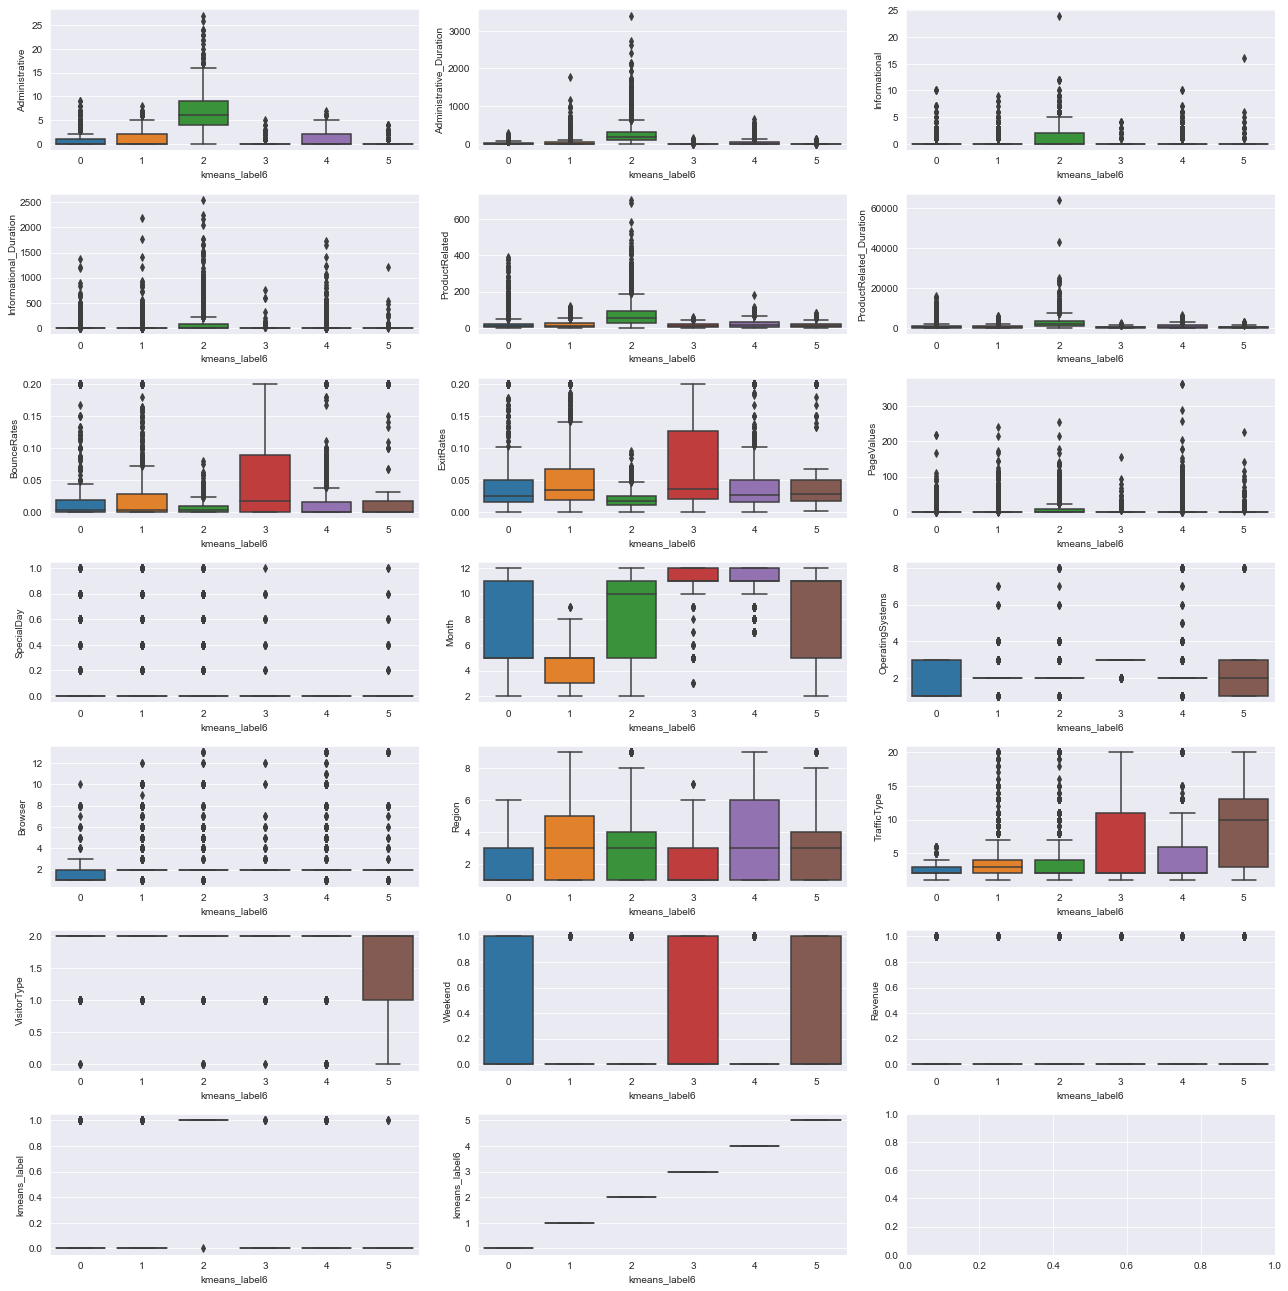

In [58]:
fig, ax = plt.subplots(7, 3, figsize=(18, 18))
for i, feature in enumerate(data1.columns):
    m, n = divmod(i, 3)
    sns.boxplot(x="kmeans_label6", y=feature, data=data1, ax = ax[m, n])
plt.tight_layout()
plt.show()

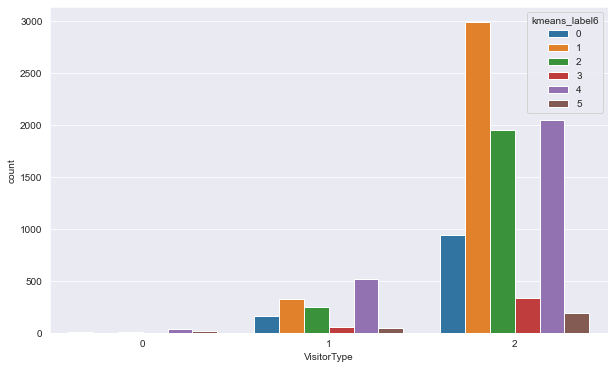

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='kmeans_label6', data=data1)
plt.show()

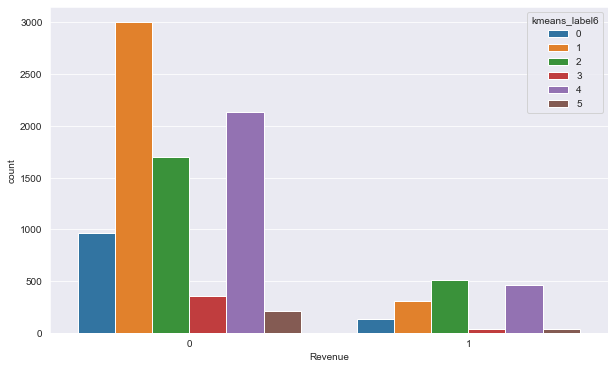

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='kmeans_label6', data=data1)
plt.show()

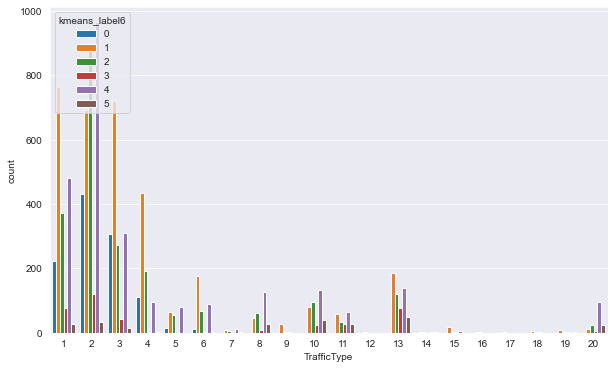

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', hue='kmeans_label6', data=data1)
plt.show()

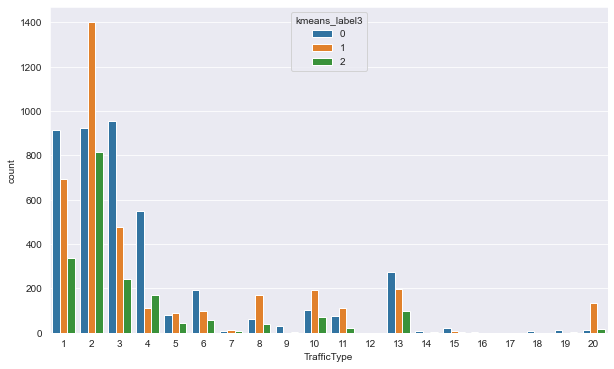

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', hue='kmeans_label3', data=data1)
plt.show()

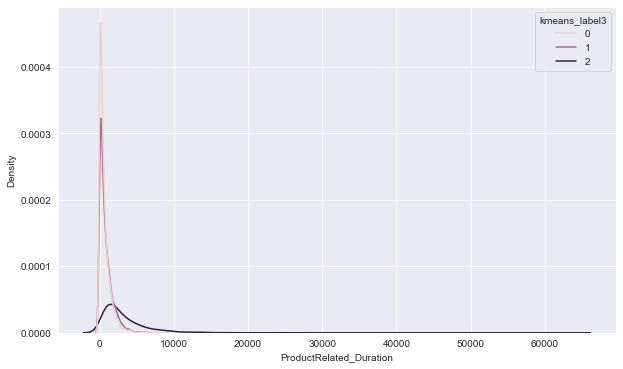

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='ProductRelated_Duration', hue='kmeans_label3', data=data1)
plt.show()

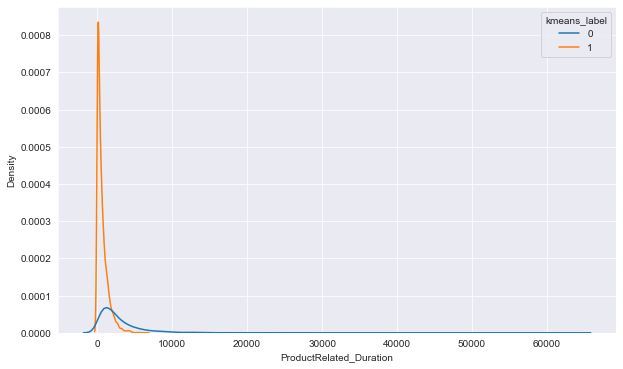

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='ProductRelated_Duration', hue='kmeans_label', data=data1)
plt.show()

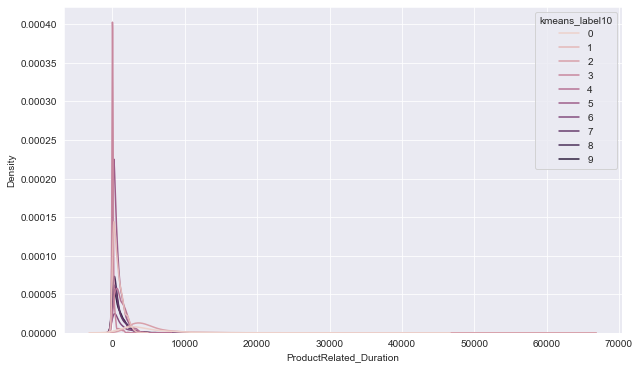

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='ProductRelated_Duration', hue='kmeans_label10', data=data1)
plt.show()

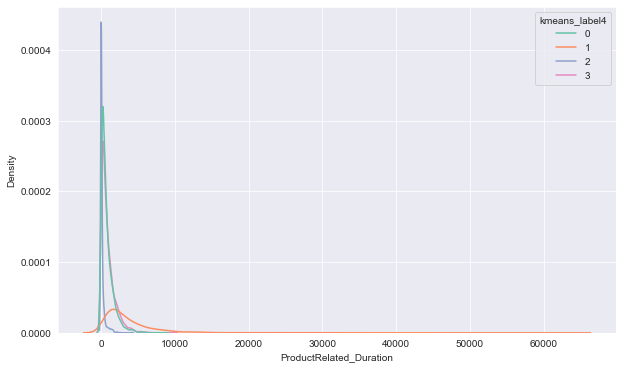

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='ProductRelated_Duration', hue='kmeans_label4', data=data1,palette="Set2")
plt.show()

In [63]:
from sklearn.decomposition import TruncatedSVD


def apply_svd2(data, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    data_svd = svd.fit_transform(data)
    return pd.DataFrame(data_svd, columns=[f'SVD{i+1}' for i in range(n_components)])

In [65]:
def plot_clusters_2ds(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot()
    scatter = ax.scatter(data['SVD1'], data['SVD2'], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('SVD1')
    ax.set_ylabel('SVD2')
    ax.set_title(title)
    plt.show()

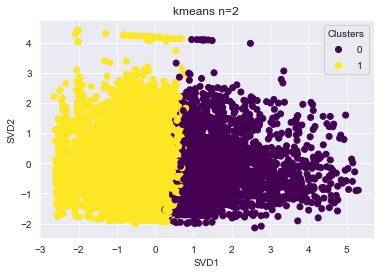

In [66]:
plot_clusters_2ds(apply_svd2(train),kmeans_labels,"kmeans n=2")

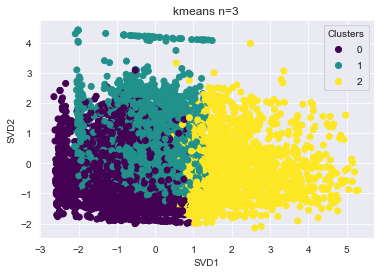

In [67]:
plot_clusters_2ds(apply_svd2(train),kmeans_labels_n3,"kmeans n=3")


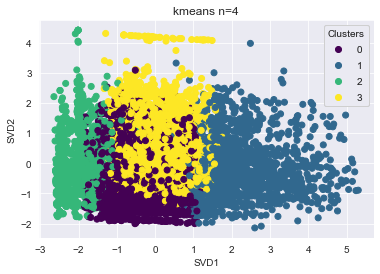

In [69]:
plot_clusters_2ds(apply_svd2(train),kmeans_labels_n4,"kmeans n=4")
